In [32]:
import sys
import os
from pathlib import Path
main_folder=str(Path.cwd().parent) # /elia_analytical_models
sys.path.append(main_folder)  
data_folder = f'{main_folder}/data'
import pandas as pd
import numpy as np
import requests
import json
import pickle
# import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
from sklearn import svm
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score

In [2]:
# dr16 = pd.read_csv(f'{data_folder}/raw/Skyserver_12_30_2019 4_49_58 PM.csv')
# with open(f'{data_folder}/interim/DR16.pkl','wb') as output_file:
#     pickle.dump(dr16, output_file)
with open(f'{data_folder}/interim/DR16.pkl','rb') as input_file:
    dr16 = pickle.load(input_file)

16 variables (double) and 1 additional variable (char) 'class'.
A class object can be predicted from the other 16 variables.
Variables description:  
objid = Object Identifier  
ra = J2000 Right Ascension (r-band)  
dec = J2000 Declination (r-band)  
u = better of deV/Exp magnitude fit (u-band)  
g = better of deV/Exp magnitude fit (g-band)  
r = better of deV/Exp magnitude fit (r-band)  
i = better of deV/Exp magnitude fit (i-band)  
z = better of deV/Exp magnitude fit (z-band)  
run = Run Number  
rerun = Rerun Number  (=301 for whole dataset)
camcol = Camera column  
field = Field number  
specobjid = Object Identifier  
class = object class (galaxy, star or quasar object)  
redshift = Final Redshift  
plate = plate number  
mjd = MJD of observation  
fiberid = fiberID 


In [3]:
dr16.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237666301628060000,47.372545,0.820621,18.69254,17.13867,16.55555,16.34662,16.17639,4849,301,5,771,8168632633242440000,STAR,0.000115,7255,56597,832
1,1237673706652430000,116.303083,42.455980,18.47633,17.30546,17.24116,17.32780,17.37114,6573,301,6,220,9333948945297330000,STAR,-0.000093,8290,57364,868
2,1237671126974140000,172.756623,-8.785698,16.47714,15.31072,15.55971,15.72207,15.82471,5973,301,1,13,3221211255238850000,STAR,0.000165,2861,54583,42
3,1237665441518260000,201.224207,28.771290,18.63561,16.88346,16.09825,15.70987,15.43491,4649,301,3,121,2254061292459420000,GALAXY,0.058155,2002,53471,35
4,1237665441522840000,212.817222,26.625225,18.88325,17.87948,17.47037,17.17441,17.05235,4649,301,3,191,2390305906828010000,GALAXY,0.072210,2123,53793,74


In [4]:
dr16.shape

(100000, 18)

In [4]:
features_band= ['ra','dec','u','g','r','i','z','redshift']
features_run = ['run','camcol','field','plate','mjd','fiberid']

In [6]:
dr16[features_band].describe()

,ra,dec,u,g,r,i,z,redshift
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,177.512888,25.052056,18.637915,17.407128,16.881676,16.625534,16.467087,0.170621
std,78.039070,20.567259,0.832284,0.985921,1.133337,1.209532,1.281788,0.437571
min,0.013061,-19.495456,10.611810,9.668339,9.005167,8.848403,8.947795,-0.004136
25%,136.356526,6.770380,18.212902,16.852982,16.196608,15.865275,15.619960,0.000001
50%,180.411688,23.918611,18.873250,17.515860,16.890640,16.599885,16.428385,0.045997
75%,224.369107,40.344539,19.273302,18.056060,17.585750,17.344912,17.234625,0.095429
max,359.999615,84.490494,19.599950,19.996050,31.990100,32.141470,29.383740,7.011245


c:\users\zarreen-naowal.reza\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'objid'}>,
        <AxesSubplot:title={'center':'ra'}>,
        <AxesSubplot:title={'center':'dec'}>,
        <AxesSubplot:title={'center':'u'}>],
       [<AxesSubplot:title={'center':'g'}>,
        <AxesSubplot:title={'center':'r'}>,
        <AxesSubplot:title={'center':'i'}>,
        <AxesSubplot:title={'center':'z'}>],
       [<AxesSubplot:title={'center':'run'}>,
        <AxesSubplot:title={'center':'rerun'}>,
        <AxesSubplot:title={'center':'camcol'}>,
        <AxesSubplot:title={'center':'field'}>],
       [<AxesSubplot:title={'center':'specobjid'}>,
        <AxesSubplot:title={'center':'redshift'}>,
        <AxesSubplot:title={'center':'plate'}>,
        <AxesSubplot:title={'center':'mjd'}>],
       [<AxesSubplot:title={'center':'fiberid'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

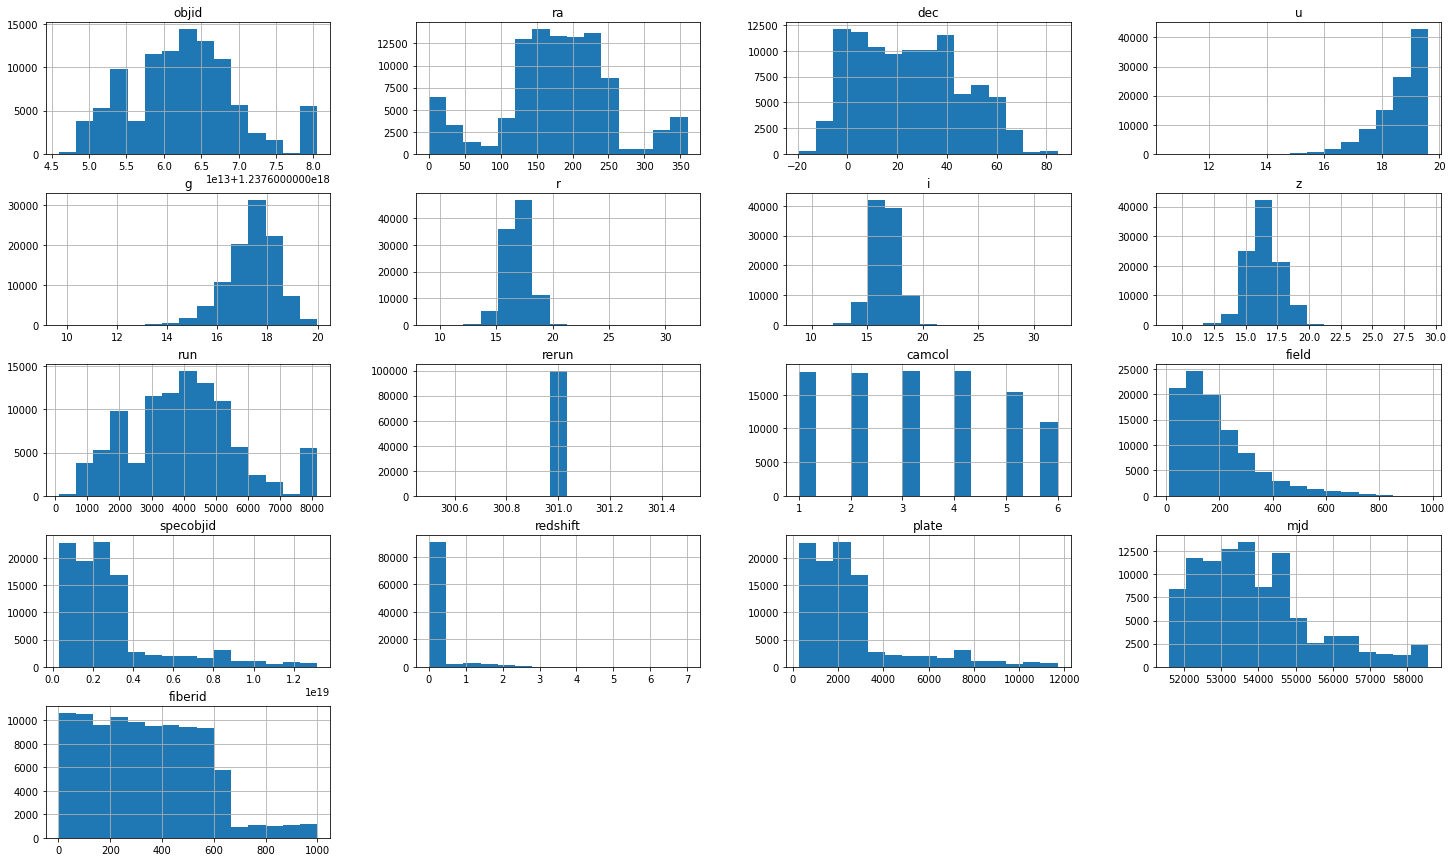

In [11]:
dr16.hist(bins=15, figsize=(25, 15), layout=(5, 4))

In [ ]:
## Create features and target data
X = dr16[features_band]
y = dr16['class']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=101)

# Classifier 
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)

# Prediction Efficiency 
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)

# Accuracy and F1 scores for SVM with Polynomial kernel:
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

In [11]:
# ## Code for creating plots
# plt.figure(figsize=(15, 5))
# plt.subplot(121)
# plt.contourf(xx, yy, Z, alpha=0.3)
# plt.set_cmap("gist_rainbow") 
# plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
# plt.xlabel('Sepal length')
# plt.ylabel('Sepal width')
# plt.xlim(xx.min(), xx.max())
# plt.title('Support Vector Classifier with rbf kernel')
# plt.plot()

### Feature Selection using Random Forest

In [5]:
# define dataset
# X = dr16.drop(['class'], axis=1)
# y = dr16['class']

X = dr16[features_band]
y = dr16['class']

0.9663004586111921 redshift
0.009434508750564133 u
0.00788984833711253 g
0.0040152164773661425 i
0.003948253628556846 z
0.0028339574337622147 ra
0.002800832387559206 dec
0.002776924373886896 r


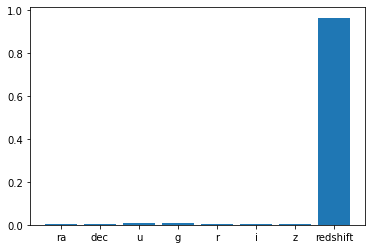

In [6]:
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for name, imp in sorted(zip(importance, X.columns),reverse=True):
    print(name, imp)
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.xticks(ticks=range(len(importance)), labels=X.columns)
pyplot.show()

0.6844855857585431 redshift
0.08686255295359495 z
0.0671658289798447 i
0.05059474452297201 r
0.04661579761418201 g
0.039506995805000035 u
0.018279170000959966 ra
0.006489324364903239 dec


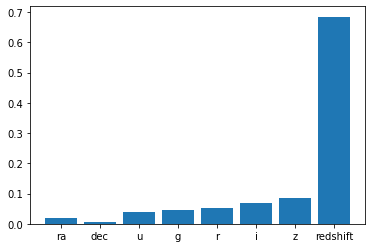

In [33]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for name, imp in sorted(zip(importance, X.columns),reverse=True):
    print(name, imp)
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.xticks(ticks=range(len(importance)), labels=X.columns)
pyplot.show()

### Minmax Scaler

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
feature_set = ['redshift', 'z', 'i', 'r', 'g', 'u', 'ra', 'dec']

In [9]:
X = X[feature_set]
X.head()

,redshift,z,i,r,g,u,ra,dec
0,0.000115,16.17639,16.34662,16.55555,17.13867,18.69254,47.372545,0.820621
1,-0.000093,17.37114,17.32780,17.24116,17.30546,18.47633,116.303083,42.455980
2,0.000165,15.82471,15.72207,15.55971,15.31072,16.47714,172.756623,-8.785698
3,0.058155,15.43491,15.70987,16.09825,16.88346,18.63561,201.224207,28.771290
4,0.072210,17.05235,17.17441,17.47037,17.87948,18.88325,212.817222,26.625225


In [10]:
scaler = MinMaxScaler()

In [11]:
X = scaler.fit_transform(X)

In [12]:
X = pd.DataFrame(X, columns=feature_set)
X.head(5)

,redshift,z,i,r,g,u,ra,dec
0,0.000606,0.353720,0.321908,0.328493,0.723329,0.899044,0.131559,0.195373
1,0.000576,0.412183,0.364031,0.358321,0.739479,0.874989,0.323040,0.595767
2,0.000613,0.336511,0.295095,0.285167,0.546334,0.652563,0.479861,0.102992
3,0.008879,0.317437,0.294571,0.308597,0.698618,0.892710,0.558941,0.464166
4,0.010883,0.396583,0.357446,0.368294,0.795059,0.920262,0.591145,0.443528


In [13]:
y.value_counts()

GALAXY    51323
STAR      38096
QSO       10581
Name: class, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=101)

# rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
# linear = svm.SVC(kernel='linear', gamma=0.5, C=0.1).fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=2, C=1).fit(X_train, y_train)

# Prediction Efficiency 
poly_pred = poly.predict(X_test)
# rbf_pred = rbf.predict(X_test)
# linear_pred = linear.predict(X_test)

# Accuracy and F1 scores for SVM with Polynomial kernel:
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

# Accuracy and F1 scores for SVM with RBF kernel:
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

# Accuracy and F1 scores for SVM with Polynomial kernel:
lin_accuracy = accuracy_score(y_test, linear_pred)
lin_f1 = f1_score(y_test, linear_pred, average='weighted')
print('Accuracy (Linear Kernel): ', "%.2f" % (lin_accuracy*100))
print('F1 (Linear Kernel): ', "%.2f" % (lin_f1*100))

Accuracy (Polynomial Kernel):  96.87
F1 (Polynomial Kernel):  96.87
Accuracy (RBF Kernel):  84.16
F1 (RBF Kernel):  84.20
Accuracy (Linear Kernel):  82.98
F1 (Linear Kernel):  83.06


### Grid Search

In [23]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVC

In [24]:
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}, {'kernel': ['poly'], 'degree': [2, 3], 'C': [1, 10, 100]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [25]:
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100], 'degree': [2, 3],
                          'kernel': ['poly']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [28]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
Y_pred = final_model.predict(X_test)
Y_pred_label = list(Y_pred)

Best score for training data: 0.985825 

Best C: 100 

Best Kernel: poly 

Best Gamma: scale 



In [34]:
print(confusion_matrix(y_test, Y_pred_label))
print("\n")
print(classification_report(y_test,Y_pred_label))

print("Training set score for SVM: %f" % final_model.score(X_train , y_train))
print("Testing  set score for SVM: %f" % final_model.score(X_test  , y_test ))

svm_model.score

[[10179    30   112]
 [   94  1992     2]
 [    1     0  7590]]


              precision    recall  f1-score   support

      GALAXY       0.99      0.99      0.99     10321
         QSO       0.99      0.95      0.97      2088
        STAR       0.99      1.00      0.99      7591

    accuracy                           0.99     20000
   macro avg       0.99      0.98      0.98     20000
weighted avg       0.99      0.99      0.99     20000

Training set score for SVM: 0.986325
Testing  set score for SVM: 0.988050


<bound method BaseSearchCV.score of GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100], 'degree': [2, 3],
                          'kernel': ['poly']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])>